# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Uncomment this if you are using Google Colab
#!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv

### Load dataset

In [11]:
df = pd.read_csv("./census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [13]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [26]:
df = df.replace(['Armed-Forces'], '?')
df['occupation'].value_counts()


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1852
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Name: occupation, dtype: int64

In [51]:
# df = df.replace(['Holand-Netherlands'], '?')
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [22]:
df = df.replace(['Without-pay', 'Never-worked'], '?')
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

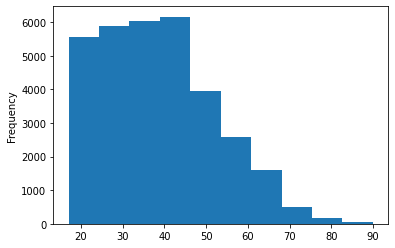

In [23]:
df['age'].plot.hist()

## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [24]:
y = df['income']
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [52]:
X = df[['age', 'workclass', 'education-num', 'occupation', 'relationship']]
X.head()

,age,workclass,education-num,occupation,relationship
0,39,State-gov,13,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,13,Exec-managerial,Husband
2,38,Private,9,Handlers-cleaners,Not-in-family
3,53,Private,7,Handlers-cleaners,Husband
4,28,Private,13,Prof-specialty,Wife


In [53]:
X = pd.get_dummies(X, columns=['workclass', 'occupation', 'relationship'])
X.head()

,age,education-num,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,13,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 1)

print ('X train shape:', X_train.shape)
print ('X test shape:', X_test.shape)
print ('y train shape:', y_train.shape)
print ('y test shape:', y_test.shape)

X train shape: (22792, 29)
X test shape: (9769, 29)
y train shape: (22792,)
y test shape: (9769,)


## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# print ('Model trained!')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print ("Train set accuracy:", model.score(X_train, y_train))
print ("Test set accuracy:", model.score(X_test, y_test))

Train set accuracy: 0.8305107055107055
Test set accuracy: 0.8295629030607022


## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [67]:
from sklearn import metrics
import numpy as np

y_pred_train = (model.predict(X_train))
print(metrics.classification_report(y_train, y_pred_train))

y_pred_test = (model.predict(X_test))
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     17303
        >50K       0.69      0.53      0.60      5489

    accuracy                           0.83     22792
   macro avg       0.78      0.73      0.75     22792
weighted avg       0.82      0.83      0.82     22792

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      7417
        >50K       0.68      0.55      0.61      2352

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [ ]:
pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])